# Criando os nomes

In [163]:
import pandas as pd

In [164]:
nomes_f = pd.read_json('https://servicodados.ibge.gov.br/api/v1/censos/nomes/ranking?qtd=200&sexo=f')
nomes_m = pd.read_json('https://servicodados.ibge.gov.br/api/v1/censos/nomes/ranking?qtd=200&sexo=m')

In [165]:
nomes_f

,nome,regiao,freq,rank,sexo
0,MARIA,0,11694738,1,F
1,ANA,0,3079729,2,F
2,FRANCISCA,0,721637,3,F
3,ANTONIA,0,588783,4,F
4,ADRIANA,0,565621,5,F
...,...,...,...,...,...
195,ROSANE,0,82203,196,F
196,IVONETE,0,81878,197,F
197,LUCIANE,0,81230,198,F
198,ISADORA,0,81100,199,F


In [166]:
nomes_m

,nome,regiao,freq,rank,sexo
0,JOSE,0,5732508,1,M
1,JOAO,0,2971935,2,M
2,ANTONIO,0,2567494,3,M
3,FRANCISCO,0,1765197,4,M
4,CARLOS,0,1483121,5,M
...,...,...,...,...,...
195,WALTER,0,67207,196,M
196,ARLINDO,0,66669,197,M
197,MICHAEL,0,65736,198,M
198,ALVARO,0,65444,199,M


In [167]:
nomes_f.sample(5)

,nome,regiao,freq,rank,sexo
167,TAINARA,0,94927,168,F
76,TATIANE,0,208945,77,F
158,INGRID,0,102491,159,F
123,IVONE,0,131256,124,F
141,NEIDE,0,113150,142,F


In [168]:
nomes_m.sample(5)

,nome,regiao,freq,rank,sexo
7,LUCAS,0,1116818,8,M
92,DIOGO,0,155247,93,M
172,WANDERSON,0,75619,173,M
153,CAUA,0,84584,154,M
165,ISAIAS,0,78418,166,M


In [169]:
nomes_f.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   nome    200 non-null    object
 1   regiao  200 non-null    int64 
 2   freq    200 non-null    int64 
 3   rank    200 non-null    int64 
 4   sexo    200 non-null    object
dtypes: int64(3), object(2)
memory usage: 7.9+ KB


In [170]:
print( 'Quantidade de nomes:' + str(len(nomes_f) + len(nomes_m)))

Quantidade de nomes:400


In [171]:
frames = [nomes_f, nomes_m]

In [172]:
nomes = pd.concat(frames)['nome'].to_frame()
nomes.sample(5)

,nome
71,BENEDITO
117,PAMELA
44,RAIMUNDA
27,LUANA
161,RAIANE


# Incluido ID dos alunos

In [173]:
import numpy as np
np.random.seed(123)

In [174]:
total_alunos = len(nomes)
total_alunos

400

In [175]:
nomes["id_aluno"] = np.random.permutation(total_alunos) + 1

In [176]:
nomes.sample(5)

,nome,id_aluno
188,POLIANA,369
57,DAIANE,303
3,FRANCISCO,382
182,CHARLES,33
30,ANDERSON,111


In [177]:
dominios = ['@dominiodoemail.com.br', '@servicodoemail.com']
nomes['dominio'] = np.random.choice(dominios, total_alunos)

In [178]:
nomes

,nome,id_aluno,dominio
0,MARIA,235,@dominiodoemail.com.br
1,ANA,43,@servicodoemail.com
2,FRANCISCA,304,@servicodoemail.com
3,ANTONIA,156,@dominiodoemail.com.br
4,ADRIANA,343,@servicodoemail.com
...,...,...,...
195,WALTER,231,@dominiodoemail.com.br
196,ARLINDO,99,@servicodoemail.com
197,MICHAEL,323,@dominiodoemail.com.br
198,ALVARO,383,@dominiodoemail.com.br


In [179]:
nomes['email'] = nomes.nome.str.cat(nomes.dominio).str.lower()

In [180]:
nomes

,nome,id_aluno,dominio,email
0,MARIA,235,@dominiodoemail.com.br,maria@dominiodoemail.com.br
1,ANA,43,@servicodoemail.com,ana@servicodoemail.com
2,FRANCISCA,304,@servicodoemail.com,francisca@servicodoemail.com
3,ANTONIA,156,@dominiodoemail.com.br,antonia@dominiodoemail.com.br
4,ADRIANA,343,@servicodoemail.com,adriana@servicodoemail.com
...,...,...,...,...
195,WALTER,231,@dominiodoemail.com.br,walter@dominiodoemail.com.br
196,ARLINDO,99,@servicodoemail.com,arlindo@servicodoemail.com
197,MICHAEL,323,@dominiodoemail.com.br,michael@dominiodoemail.com.br
198,ALVARO,383,@dominiodoemail.com.br,alvaro@dominiodoemail.com.br


# Criando Cursos

In [181]:
!pip3 install html5lib
!pip3 install lxml

In [182]:
import html5lib

In [183]:
url = 'http://tabela-cursos.herokuapp.com/index.html'
cursos = pd.read_html(url)
cursos

[                          Nome do curso
 0                 Lógica de programação
 1                         Java para Web
 2                           C# para Web
 3                         Ruby on Rails
 4                      Cursos de Python
 5                         PHP com MySql
 6                         .NET para web
 7            Novas integrações com Java
 8                          TDD com Java
 9                   Código limpo com C#
 10  Preparatório para certificação Java
 11                      Hardware básico
 12                Persistência com .NET
 13                  Desenvolvendo jogos
 14                     Análise de dados
 15                   Estatística básica
 16                  Internet das coisas
 17                Programação funcional
 18                Boas práticas em Java
 19          Orientação objetos com Java]

In [184]:
type(cursos)

list

In [185]:
cursos = cursos[0]

In [186]:
cursos.head(5)

,Nome do curso
0,Lógica de programação
1,Java para Web
2,C# para Web
3,Ruby on Rails
4,Cursos de Python


In [187]:
cursos = cursos.rename(columns={'Nome do curso': 'Nome_do_curso'})

In [188]:
cursos['id'] = cursos.index + 1

In [189]:
cursos.head()

,Nome_do_curso,id
0,Lógica de programação,1
1,Java para Web,2
2,C# para Web,3
3,Ruby on Rails,4
4,Cursos de Python,5


In [190]:
cursos = cursos.set_index('id')
cursos

,Nome_do_curso
id,
1,Lógica de programação
2,Java para Web
3,C# para Web
4,Ruby on Rails
5,Cursos de Python
6,PHP com MySql
7,.NET para web
8,Novas integrações com Java
9,TDD com Java


# Matriculando alunos nos cursos

In [191]:
nomes

,nome,id_aluno,dominio,email
0,MARIA,235,@dominiodoemail.com.br,maria@dominiodoemail.com.br
1,ANA,43,@servicodoemail.com,ana@servicodoemail.com
2,FRANCISCA,304,@servicodoemail.com,francisca@servicodoemail.com
3,ANTONIA,156,@dominiodoemail.com.br,antonia@dominiodoemail.com.br
4,ADRIANA,343,@servicodoemail.com,adriana@servicodoemail.com
...,...,...,...,...
195,WALTER,231,@dominiodoemail.com.br,walter@dominiodoemail.com.br
196,ARLINDO,99,@servicodoemail.com,arlindo@servicodoemail.com
197,MICHAEL,323,@dominiodoemail.com.br,michael@dominiodoemail.com.br
198,ALVARO,383,@dominiodoemail.com.br,alvaro@dominiodoemail.com.br


In [192]:
nomes['matriculas'] = np.ceil(np.random.exponential(size = total_alunos)* 1.5).astype(int)

In [193]:
nomes.sample(5)

,nome,id_aluno,dominio,email,matriculas
193,LUCILENE,146,@dominiodoemail.com.br,lucilene@dominiodoemail.com.br,2
187,ELTON,97,@dominiodoemail.com.br,elton@dominiodoemail.com.br,2
32,MARCIO,322,@dominiodoemail.com.br,marcio@dominiodoemail.com.br,2
113,VICENTE,260,@servicodoemail.com,vicente@servicodoemail.com,2
199,NILZA,35,@dominiodoemail.com.br,nilza@dominiodoemail.com.br,1


In [194]:
nomes.matriculas.describe()

count    400.000000
mean       2.120000
std        1.498738
min        1.000000
25%        1.000000
50%        2.000000
75%        3.000000
max       10.000000
Name: matriculas, dtype: float64

In [195]:
import seaborn as sns

C:\Users\PC I3\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='matriculas', ylabel='Density'>

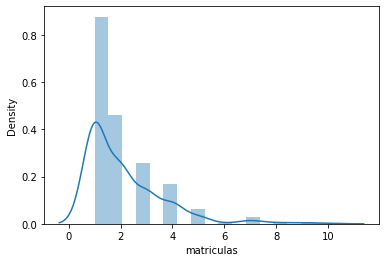

In [196]:
sns.distplot(nomes.matriculas)

In [197]:
nomes.matriculas.value_counts()

1     186
2      98
3      55
4      36
5      13
7       6
8       2
9       2
6       1
10      1
Name: matriculas, dtype: int64

In [198]:
nomes.sample(10)

,nome,id_aluno,dominio,email,matriculas
194,CLARA,277,@servicodoemail.com,clara@servicodoemail.com,2
64,ROBSON,290,@dominiodoemail.com.br,robson@dominiodoemail.com.br,4
13,DANIEL,195,@servicodoemail.com,daniel@servicodoemail.com,3
98,GILSON,134,@dominiodoemail.com.br,gilson@dominiodoemail.com.br,7
33,NATALIA,192,@dominiodoemail.com.br,natalia@dominiodoemail.com.br,1
146,SAMARA,352,@servicodoemail.com,samara@servicodoemail.com,1
2,ANTONIO,205,@dominiodoemail.com.br,antonio@dominiodoemail.com.br,8
23,FERNANDO,321,@dominiodoemail.com.br,fernando@dominiodoemail.com.br,3
160,MOACIR,181,@dominiodoemail.com.br,moacir@dominiodoemail.com.br,5
129,AILTON,26,@servicodoemail.com,ailton@servicodoemail.com,4


In [199]:
todas_matriculas = []
x = np.random.rand(20)
prob = x / sum(x)

In [200]:
for index, row in nomes.iterrows():
    id = row.id_aluno
    matriculas = row.matriculas
    for i in range(matriculas):
        mat = [id, np.random.choice(cursos.index, p = prob)]
        todas_matriculas.append(mat)

matriculas = pd.DataFrame(todas_matriculas, columns = ['id_aluno', 'id_curso'])

In [201]:
matriculas.head(10)

,id_aluno,id_curso
0,235,13
1,43,6
2,43,2
3,43,5
4,43,13
5,43,6
6,304,8
7,156,14
8,156,17
9,156,20


In [202]:
matriculas.groupby('id_curso').count().join(cursos['Nome_do_curso'])

,id_aluno,Nome_do_curso
id_curso,,
2,40,Java para Web
3,18,C# para Web
4,7,Ruby on Rails
5,65,Cursos de Python
6,34,PHP com MySql
7,20,.NET para web
8,119,Novas integrações com Java
9,28,TDD com Java
10,7,Código limpo com C#


In [203]:
matriculas.groupby('id_curso').count().join(cursos['Nome_do_curso']).rename(columns={'id_aluno':'quantidade_de_alunos'})

,quantidade_de_alunos,Nome_do_curso
id_curso,,
2,40,Java para Web
3,18,C# para Web
4,7,Ruby on Rails
5,65,Cursos de Python
6,34,PHP com MySql
7,20,.NET para web
8,119,Novas integrações com Java
9,28,TDD com Java
10,7,Código limpo com C#


In [204]:
nomes.sample(5)

,nome,id_aluno,dominio,email,matriculas
102,HELIO,117,@dominiodoemail.com.br,helio@dominiodoemail.com.br,1
121,ADEMIR,305,@servicodoemail.com,ademir@servicodoemail.com,2
67,PAULA,212,@dominiodoemail.com.br,paula@dominiodoemail.com.br,1
154,SIDNEI,291,@servicodoemail.com,sidnei@servicodoemail.com,4
183,IRACI,8,@dominiodoemail.com.br,iraci@dominiodoemail.com.br,4


In [205]:
cursos.head(5)

,Nome_do_curso
id,
1,Lógica de programação
2,Java para Web
3,C# para Web
4,Ruby on Rails
5,Cursos de Python


In [206]:
matriculas.sample(5)

,id_aluno,id_curso
702,269,20
801,312,17
514,123,5
241,300,8
207,211,17


In [207]:
matriculas_por_curso = matriculas.groupby('id_curso').count().join(cursos['Nome_do_curso'])
matriculas_por_curso.head(5)

,id_aluno,Nome_do_curso
id_curso,,
2,40,Java para Web
3,18,C# para Web
4,7,Ruby on Rails
5,65,Cursos de Python
6,34,PHP com MySql


# Exportando DataFrames

In [208]:
matriculas_por_curso.head(3)

,id_aluno,Nome_do_curso
id_curso,,
2,40,Java para Web
3,18,C# para Web
4,7,Ruby on Rails


In [209]:
matriculas_por_curso.to_csv('matriculas_por_curso', index = False)

In [210]:
pd.read_csv('matriculas_por_curso')

,id_aluno,Nome_do_curso
0,40,Java para Web
1,18,C# para Web
2,7,Ruby on Rails
3,65,Cursos de Python
4,34,PHP com MySql
5,20,.NET para web
6,119,Novas integrações com Java
7,28,TDD com Java
8,7,Código limpo com C#
9,54,Preparatório para certificação Java


In [211]:
matriculas_json = matriculas_por_curso.to_json()
matriculas_json

'{"id_aluno":{"2":40,"3":18,"4":7,"5":65,"6":34,"7":20,"8":119,"9":28,"10":7,"11":54,"12":88,"13":92,"14":14,"15":43,"16":26,"17":107,"18":28,"19":19,"20":39},"Nome_do_curso":{"2":"Java para Web","3":"C# para Web","4":"Ruby on Rails","5":"Cursos de Python","6":"PHP com MySql","7":".NET para web","8":"Novas integra\\u00e7\\u00f5es com Java","9":"TDD com Java","10":"C\\u00f3digo limpo com C#","11":"Preparat\\u00f3rio para certifica\\u00e7\\u00e3o Java","12":"Hardware b\\u00e1sico","13":"Persist\\u00eancia com .NET","14":"Desenvolvendo jogos","15":"An\\u00e1lise de dados","16":"Estat\\u00edstica b\\u00e1sica","17":"Internet das coisas","18":"Programa\\u00e7\\u00e3o funcional","19":"Boas pr\\u00e1ticas em Java","20":"Orienta\\u00e7\\u00e3o objetos com Java"}}'

In [212]:
matriculas_html = matriculas_por_curso.to_html()
print(matriculas_html)

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>id_aluno</th>
      <th>Nome_do_curso</th>
    </tr>
    <tr>
      <th>id_curso</th>
      <th></th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>2</th>
      <td>40</td>
      <td>Java para Web</td>
    </tr>
    <tr>
      <th>3</th>
      <td>18</td>
      <td>C# para Web</td>
    </tr>
    <tr>
      <th>4</th>
      <td>7</td>
      <td>Ruby on Rails</td>
    </tr>
    <tr>
      <th>5</th>
      <td>65</td>
      <td>Cursos de Python</td>
    </tr>
    <tr>
      <th>6</th>
      <td>34</td>
      <td>PHP com MySql</td>
    </tr>
    <tr>
      <th>7</th>
      <td>20</td>
      <td>.NET para web</td>
    </tr>
    <tr>
      <th>8</th>
      <td>119</td>
      <td>Novas integrações com Java</td>
    </tr>
    <tr>
      <th>9</th>
      <td>28</td>
      <td>TDD com Java</td>
    </tr>
    <tr>
      <th>10</th>
      <td>7</td>
      <td>Código limp

# Criando banco SQL

In [213]:
!pip install sqlalchemy

In [214]:
from sqlalchemy import create_engine, MetaData, Table

In [215]:
engine = create_engine('sqlite:///:memory:')

In [216]:
engine

Engine(sqlite:///:memory:)

In [217]:
type(engine)

sqlalchemy.engine.base.Engine

In [218]:
matriculas_por_curso.head(10)

,id_aluno,Nome_do_curso
id_curso,,
2,40,Java para Web
3,18,C# para Web
4,7,Ruby on Rails
5,65,Cursos de Python
6,34,PHP com MySql
7,20,.NET para web
8,119,Novas integrações com Java
9,28,TDD com Java
10,7,Código limpo com C#


In [219]:
matriculas_por_curso.to_sql('matriculas', engine)

19

In [220]:
print(engine.table_names())

['matriculas']


C:\Users\PC I3\AppData\Local\Temp\ipykernel_2896\1043810782.py:1: SADeprecationWarning: The Engine.table_names() method is deprecated and will be removed in a future release.  Please refer to Inspector.get_table_names(). (deprecated since: 1.4)
  print(engine.table_names())


In [221]:
query = 'select * from matriculas where id_aluno < 20'

In [222]:
pd.read_sql(query, engine)

,id_curso,id_aluno,Nome_do_curso
0,3,18,C# para Web
1,4,7,Ruby on Rails
2,10,7,Código limpo com C#
3,14,14,Desenvolvendo jogos
4,19,19,Boas práticas em Java


In [223]:
muitas_matriculas = pd.read_sql_table('matriculas', engine, columns=['Nome_do_curso', 'id_aluno'])
muitas_matriculas

,Nome_do_curso,id_aluno
0,Java para Web,40
1,C# para Web,18
2,Ruby on Rails,7
3,Cursos de Python,65
4,PHP com MySql,34
5,.NET para web,20
6,Novas integrações com Java,119
7,TDD com Java,28
8,Código limpo com C#,7
9,Preparatório para certificação Java,54


In [224]:
muitas_matriculas = muitas_matriculas.query('id_aluno > 80')

In [225]:
muitas_matriculas

,Nome_do_curso,id_aluno
6,Novas integrações com Java,119
10,Hardware básico,88
11,Persistência com .NET,92
15,Internet das coisas,107


# Escrevendo no banco

In [226]:
muitas_matriculas.to_sql('muitas_matriculas', con = engine)

4

In [227]:
print(engine.table_names())

['matriculas', 'muitas_matriculas']


C:\Users\PC I3\AppData\Local\Temp\ipykernel_2896\1043810782.py:1: SADeprecationWarning: The Engine.table_names() method is deprecated and will be removed in a future release.  Please refer to Inspector.get_table_names(). (deprecated since: 1.4)
  print(engine.table_names())


# Nomes dos alunos da próxima turma

In [228]:
matriculas_por_curso

,id_aluno,Nome_do_curso
id_curso,,
2,40,Java para Web
3,18,C# para Web
4,7,Ruby on Rails
5,65,Cursos de Python
6,34,PHP com MySql
7,20,.NET para web
8,119,Novas integrações com Java
9,28,TDD com Java
10,7,Código limpo com C#


In [229]:
matriculas

,id_aluno,id_curso
0,235,13
1,43,6
2,43,2
3,43,5
4,43,13
...,...,...
843,323,17
844,383,16
845,366,6
846,366,17


In [230]:
id_curso = 8
proxima_turma = matriculas.query("id_curso == {}".format(id_curso))
proxima_turma

,id_aluno,id_curso
6,304,8
11,156,8
20,174,8
23,174,8
26,218,8
...,...,...
808,254,8
818,225,8
824,114,8
828,226,8


In [231]:
nomes

,nome,id_aluno,dominio,email,matriculas
0,MARIA,235,@dominiodoemail.com.br,maria@dominiodoemail.com.br,1
1,ANA,43,@servicodoemail.com,ana@servicodoemail.com,5
2,FRANCISCA,304,@servicodoemail.com,francisca@servicodoemail.com,1
3,ANTONIA,156,@dominiodoemail.com.br,antonia@dominiodoemail.com.br,5
4,ADRIANA,343,@servicodoemail.com,adriana@servicodoemail.com,1
...,...,...,...,...,...
195,WALTER,231,@dominiodoemail.com.br,walter@dominiodoemail.com.br,1
196,ARLINDO,99,@servicodoemail.com,arlindo@servicodoemail.com,3
197,MICHAEL,323,@dominiodoemail.com.br,michael@dominiodoemail.com.br,1
198,ALVARO,383,@dominiodoemail.com.br,alvaro@dominiodoemail.com.br,1


In [232]:
proxima_turma.set_index('id_aluno').join(nomes.set_index('id_aluno'))

,id_curso,nome,dominio,email,matriculas
id_aluno,,,,,
7,8,SOLANGE,@dominiodoemail.com.br,solange@dominiodoemail.com.br,3
9,8,RENAN,@dominiodoemail.com.br,renan@dominiodoemail.com.br,3
11,8,PAULO,@servicodoemail.com,paulo@servicodoemail.com,2
19,8,VALMIR,@dominiodoemail.com.br,valmir@dominiodoemail.com.br,4
24,8,JOAO,@servicodoemail.com,joao@servicodoemail.com,7
...,...,...,...,...,...
375,8,MARA,@servicodoemail.com,mara@servicodoemail.com,4
380,8,ELZA,@dominiodoemail.com.br,elza@dominiodoemail.com.br,5
385,8,MICHEL,@servicodoemail.com,michel@servicodoemail.com,1


In [236]:
proxima_turma = proxima_turma.set_index('id_aluno').join(nomes.set_index('id_aluno'))[['nome']]

In [237]:
nome_curso = cursos.loc[id_curso]
nome_curso

Nome_do_curso    Novas integrações com Java
Name: 8, dtype: object

In [238]:
proxima_turma

,nome
id_aluno,
7,SOLANGE
9,RENAN
11,PAULO
19,VALMIR
24,JOAO
...,...
375,MARA
380,ELZA
385,MICHEL


In [240]:
proxima_turma = proxima_turma.rename(columns = {'nome': 'Alunos do curso de Novas integrações com Java'})

In [241]:
proxima_turma.sample(5)

,Alunos do curso de Novas integrações com Java
id_aluno,
339,THIAGO
7,SOLANGE
34,BRUNA
34,BRUNA
247,RAIANE


# Exportando excel

In [248]:
proxima_turma.to_excel('proxima_turma.xlsx', index=False)

ModuleNotFoundError: No module named 'openpyxl'